<a href="https://colab.research.google.com/github/vincentiusbernando/Student_Performance/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('DATA.csv')
print(df)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

In [ ]:
df.rename(columns={"STUDENT ID":"student_id","1":"student_age","2":"sex","3":"high_school_type","4":"scholarship_type","5":"additional_work"
                    ,"6":"acti","7":"partner","8":"salary","9":"transportation","10":"accomodation","11":"mother_ed","12":"father_ed",
                   "13":"sibling","14":"parent_status","15":"mother_occupation","16":"father_occupation","17":"weekly_study_hours","18":"nonscience_read_freq",
                   "19":"science_read_freq","20":"seminar_attendance","21":"impact","22":"class_attendance","23":"midterm_prep1","24":"midterm_prep2",
                   "25":"taking_note","26":"listen_class","27":"discuss_improve","28":"flip","29":"cum_grade","30":"cum_expect", "COURSE ID":"course_id",
                   "GRADE":"grade"}, inplace=True)

In [ ]:
data_dict={
    "student_age":{
        "1":"18-21",
        "2":"22-25",
        "3":"above 26"
    },
    "sex":{
        "1":"female",
        "2":"male"
    },
    "high_school_type":{
        "1":"private",
        "2":"state",
        "3":"other"
    },
    "scholarship_type":{
        "1":"None",
        "2":"25%",
        "3":"50%",
        "4":"75%",
        "5":"Full"
    },
    "additional_work":{
        "1":"Yes",
        "2":"No"
    },
    "acti":{
        "1":"Yes",
        "2":"No"
    },
    "partner":{
        "1":"Yes",
        "2":"No"
    },
    "salary":{
        "1":"USD 135-200",
        "2":"USD 201-270",
        "3":"USD 271-340",
        "4":"USD 341-410",
        "5":"above 410",

    },
    "transportation":{
        "1":"Bus",
        "2":"Private car/taxi",
        "3":"Bicycle",
        "4":"Other"
    },
    "accomodation":{
        "1":"rental",
        "2":"dormitory",
        "3":"with family",
        "4":"Other"
    },
    "mother_ed":{
        "1":"primary school",
        "2":"secondary school",
        "3":"high school",
        "4":"university",
        "5":"MSc.",
        "6":"Ph.D."
    },
    "father_ed":{
        "1":"primary school",
        "2":"secondary school",
        "3":"high school",
        "4":"university",
        "5":"MSc.",
        "6":"Ph.D."
    },
    "sibling":{
        "1":"1",
        "2":"2",
        "3":"3",
        "4":"4",
        "5":"5 or above"
    },
    "parent_status":{
        "1":"married",
        "2":"divorced",
        "3":"died - one of them or both"
    },
    "mother_occupation":{
        "1":"retired",
        "2":"housewife",
        "3":"government officer",
        "4":"private sector employee",
        "5":"self-employment",
        "6":"other"
    },
    "father_occupation":{
        "1":"retired",
        "2":"government officer",
        "3":"private sector employee",
        "4":"self-employment",
        "5":"other"
    },
    "weekly_study_hours":{
        "1":"None",
        "2":"<5 hours",
        "3":"6-10 hours",
        "4":"11-20 hours",
        "5":"more than 20 hours"
    },
    "nonscience_read_freq":{
        "1":"None",
        "2":"Sometimes",
        "3":"Often"
    },
    "science_read_freq":{
        "1":"None",
        "2":"Sometimes",
        "3":"Often"
    },
    "seminar_attendance":{
        "1":"Yes",
        "2":"No"
    },
    "impact":{
        "1":"positive",
        "2":"negative",
        "3":"neutral",

    },
    "class_attendance":{
        "1":"always",
        "2":"sometimes",
        "3":"never"
    },
    "midterm_prep1":{
        "1":"alone",
        "2":"with friends",
        "3":"not applicable"
    },
    "midterm_prep2":{
        "1":"closest date to the exam",
        "2":"regularly during the semester",
        "3":"never"
    },
    "taking_note":{
        "1":"never",
        "2":"sometimes",
        "3":"always"
    },
    "listen_class":{
        "1":"never",
        "2":"sometimes",
        "3":"always"
    },
    "discuss_improve":{
        "1":"never",
        "2":"sometimes",
        "3":"always"
    },
    "flip":{
        "1":"not useful",
        "2":"useful",
        "3":"not applicable"
    },
    "cum_grade":{
        "1":"<2.00",
        "2":"2.00-2.49",
        "3":"2.50-2.99",
        "4":"3.00-3.49",
        "5":"above 3.49"
    },
    "cum_expect":{
        "1":"<2.00",
        "2":"2.00-2.49",
        "3":"2.50-2.99",
        "4":"3.00-3.49",
        "5":"above 3.49"
    },
    "course_id":{
        "1":"1",
        "2":"2",
        "3":"3",
        "4":"4",
        "5":"5",
        "6":"6",
        "7":"7",
        "8":"8",
        "9":"9",
    },
    "grade":{
        "0":"Fail",
        "1":"DD",
        "2":"DC",
        "3":"CC",
        "4":"CB",
        "5":"BB",
        "6":"BA",
        "7":"AA"
    }
}


<ipython-input-12-25dd08c454ea>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,4,count)


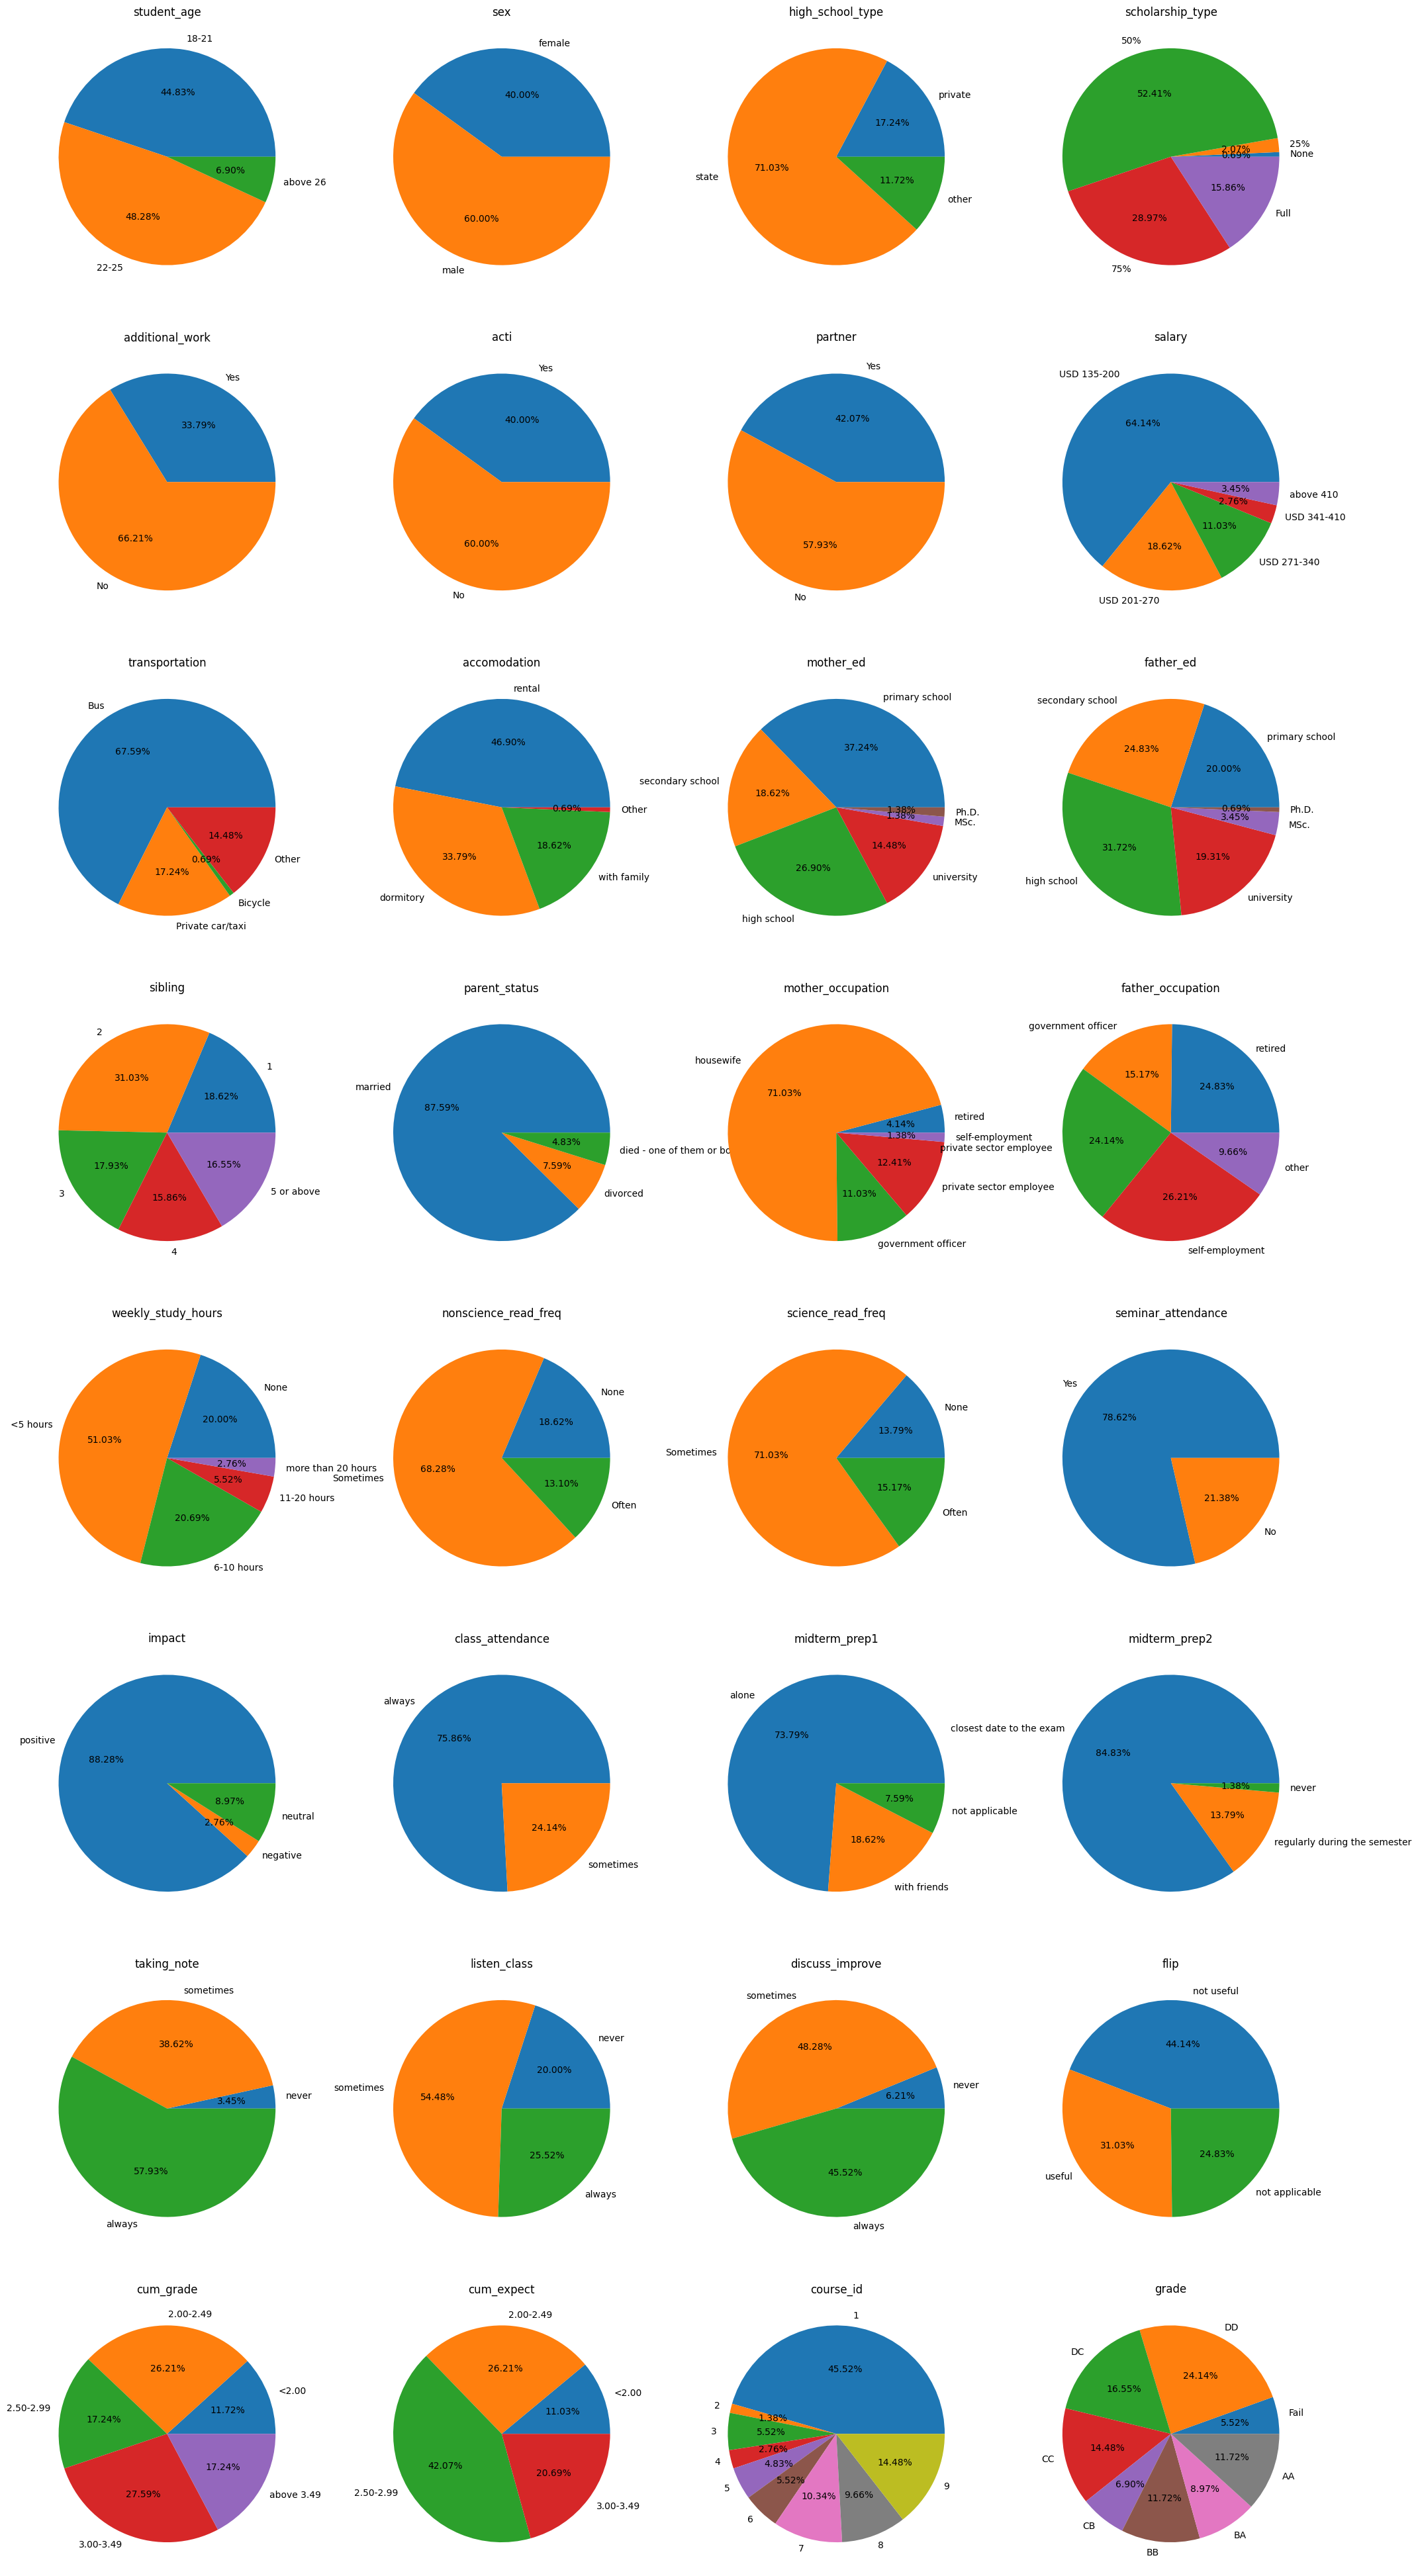

In [ ]:
#general visualization
plt.subplots(figsize=(25,50))
count=1
for i in df.columns[1:]:
  list_num=[]
  list_label=[]
  for value in set(df[i]):
    plt.subplot(8,4,count)
    list_num.append(len(df[df[i]==value]))
    list_label.append(data_dict[i][str(value)])
  plt.pie(list_num, labels=list_label, autopct='%1.2f%%')
  plt.title(i)
  count+=1
plt.show()